#Polynomial Interpolation

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.html.widgets import interact
from IPython.html import widgets

:0: FutureWarning: IPython widgets are experimental and may change in the future.


###Lagrange Interpolation

Lagrange interpolation is one method of polynomial interpolation.
It interpolates the points $(x_i,y_i)$ by writing a polynomial as a linear combination of basis functions, $L_j$, where

$$ L_j(x_i) = \begin{cases} 0 &\mbox{ if } i \neq j\\ 1 &\mbox{ if } i =j \\ \end{cases} $$

Then the polynomial can be written
$$
p(x) = \sum_{j=1}^n y_j L_j(x)
$$

This can be computed in $O(n^2)$.

In [2]:
def Lj(ip_x, xpts):
        """
        Builds an array of Lagrange basis functions
        Parameters
        ip_x - the interpolation points
        xpts - points to evaluate the basis functions at 

        Returns
        a 2D array of basis vectors as rows
        """
        n = len(ip_x)
        L =[]
        for j in range(n):
            a = 1
            for k in range(n):
                if j!=k:
                    a *= (xpts-ip_x[k])/(ip_x[j]-ip_x[k])
            L.append(a)
        return np.vstack(L)

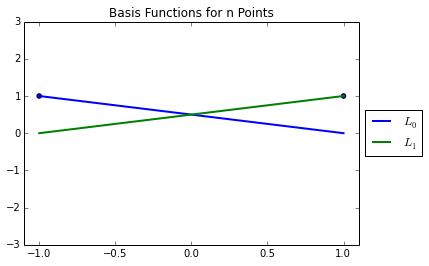

<function __main__.plot_basis>

In [3]:
def plot_basis(n):
    '''
    Plots the Lagrange interpolation basis functions for n evenly spaced points
    '''
    ip_x = np.linspace(-1,1,n)
    xpts = np.linspace(-1,1,100)
    Ljs = Lj(ip_x, xpts)
    for i in xrange(n):
        plt.plot(xpts,Ljs[i],label="$L_" + str(i) + "$",linewidth=2.0)
    plt.scatter(ip_x, np.ones(ip_x.shape))
    plt.title("Basis Functions for n Points")
    plt.ylim(-3,3)
    plt.xlim(-1.1,1.1)
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()
    
interact(plot_basis, n=widgets.IntSliderWidget(min=2,max=6,step=1,value=2))

### Choosing Interpolation Points

Polynomial Interpolation with evenly spaced points is ill-conditioned.
This is since a small error in a $y_i$ value near the middle of the interval of interpolation can cause large errors in the interpolant near the boundaries of the interval.
Wilkinson's polynomial is a famous example of how using a high-order polynomial and evenly spaced interpolation points is an ill-conditioned problem.
It is the polynomial with roots 1-20, or 
$$f(x) = \prod_{i=1}^{20}(x-i)$$

The code below plots polynomials with $n$ roots. So Wilkson's polynomial is when $n = 20$.
Notice how as the number of interpolation points increase, the fluctuations near the endpoints increase. 

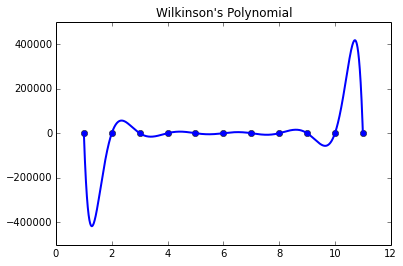

<function __main__.plot_wilk_poly>

In [4]:
def plot_wilk_poly(n):
    '''
    Plots Wilkinson's polynomial with n roots
    '''
    num_pts = 10000
    ip_x = np.arange(1, n+1)
    xpts = np.linspace(1, n, num_pts)
    y = np.ones(num_pts)
    plt.plot(ip_x, np.zeros(n), 'bo')
    for x in ip_x:
        y *= x - xpts
    plt.plot(xpts, y, linewidth=2.0)
    plt.title("Wilkinson's Polynomial")
    plt.xlim(0, n+1)
    plt.show()
    
interact(plot_wilk_poly, n=(2,20,1))

One way to avoid this instability is to use Chebyshev nodes as the interpolation points.
These nodes are the x-coordinates of points evenly spaced around the unit circle.
This puts more points near the ends of the interval.
The formula for the Chebyshev nodes is:
$$
\cos\left[\frac{\pi}{n}(k+\frac{1}{2})\right] \text{ for }  k \in \mathbb{Z}, 0\leq k \lt n
$$

In [5]:
def cheb_nodes(n):
    """Calculate ip_x"""
    k = np.arange(0, n)
    return np.cos(np.pi/n*(k+.5))

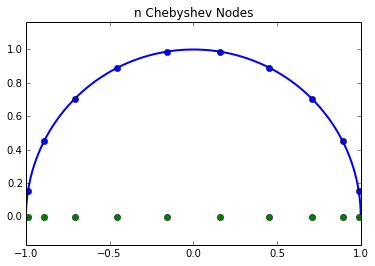

<function __main__.plot_cheb>

In [6]:
def plot_cheb(n):
    # plot the unit circle
    j = np.linspace(0, np.pi, 1000)
    circ_x = np.cos(j)
    circ_y = np.sin(j)
    plt.plot(circ_x, circ_y, 'b', linewidth=2.0)
    
    # make n evenly spaced points on the circle
    k = np.arange(0,n)
    x = np.cos(np.pi/n*(k+.5))
    y = np.sin(np.pi/n*(k+.5))
    plt.plot(x, y, 'bo')
    
    # plot chebyshev nodes
    plt.plot(x, np.zeros(n), 'go')

    plt.axis('equal')
    plt.title("n Chebyshev Nodes")
    plt.show()
    
interact(plot_cheb, n=widgets.IntSliderWidget(min=3,max=30,step=1,value=10))

Consider interpolating Runge's function $\left(f(x) = \frac{1}{1+25x^2}\right)$ using evenly spaced points and Chebyshev nodes.
Even for a small number of evenly spaced interpolation points, the interpolant begins to diverge from the function at the edges of the interval.
This is called Runge's phenomenon.

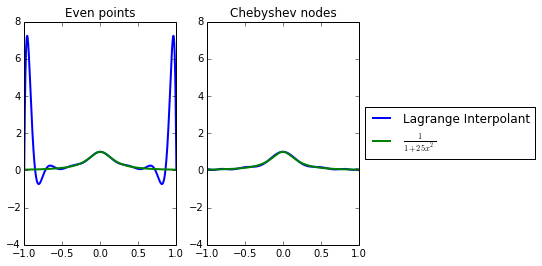

<function __main__.plot_interpolate>

In [7]:
def runge(x):
    return 1.0/(1+25.0*x**2)
def interpolate(basis, ip_y):
    '''
    Calculates the interpolating polynomial using the basis functions returned 
    by L_j and the y-values for the interpolation points
    '''
    return np.sum((basis.T*ip_y), axis=1)
def plot_interpolate(n):
    '''
    Plots interpolation of Runge's function with n evenly spaced points and n chebyshev points
    '''
    # evenly spaced interpolation points
    ip_x = np.linspace(-1, 1, n)
    ip_y = runge(ip_x)
    xpts = np.linspace(-1, 1, 1000)
    basis = Lj(ip_x, xpts)
    y = interpolate(basis, ip_y)
    
    plt.subplot(121)
    plt.title("Even points")
    plt.plot(xpts, y, 'b', linewidth=2.0)
    plt.plot(xpts, runge(xpts), 'g', linewidth=2.0)
    plt.ylim(-4, 8)
    
    # chebyshev interpolation points
    ip_x = cheb_nodes(n)
    ip_y = runge(ip_x)
    xpts = np.linspace(-1,1,1000)
    basis = Lj(ip_x, xpts)
    y = interpolate(basis, ip_y)
    
    plt.subplot(122)
    plt.title("Chebyshev nodes")
    plt.plot(xpts, y, 'b', label="Lagrange Interpolant", linewidth=2.0)
    plt.plot(xpts, runge(xpts), 'g', label="$\\frac{1}{1+25x^2}$", linewidth=2.0)
    plt.ylim(-4, 8)
    plt.legend(loc="center left", bbox_to_anchor=(1,0.5))
    plt.show()
interact(plot_interpolate, n=(10,20,1))

###Barycentric Lagrange Interpolation

The polynomial interpolation for a certain number of points is unique, but we can change how we compute it.
We can rewrite the Lagrange interpolant to only require $O(n)$ computations and to be numerically stable.
The interpolant is written as:


$$p(x) = \frac{\displaystyle\sum_{k=1}^n \frac{w_k y_k}{x-x_k}}{\displaystyle\sum_{k=1}^n \frac{w_k}{x-x_k}} $$

This allows us to interpolate a higher number of points.
Compare Lagrange interpolation with Barycentric Lagrange interpolation.
The interpolation polynomial is the same, but as the number of interpolation points increases, Lagrange interpolation becomes unstable.
We can see this in the code below by where the interpolant diverges from the function and oscillates wildly.

In [8]:
def bary_lagrange(ip_x, ip_y, interval, npoints=500):
    """Faster Lagrange calculator."""
    interval = np.linspace(interval[0], interval[1], float(npoints))

    # calculate barycentric weights
    c = (max(ip_x)-min(ip_x))/4.0
    w = np.zeros_like(ip_x.T)
    shuffle = np.random.permutation(len(ip_x)-1)
    for k in range(len(ip_x)):
        test = (ip_x[k]-ip_x)/c
        test = np.delete(test, k)
        test = test[shuffle]
        w[k] = 1.0/np.prod(test)

    # calculate p(x)
    numer = np.sum([(w[k]*ip_y[k])/(interval-ip_x[k]) for k in range(len(ip_x))], axis=0)
    denom = np.sum([w[k]/(interval-ip_x[k]) for k in range(len(ip_x))], axis=0)
    return numer/denom

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:17: RuntimeWarning: overflow encountered in multiply


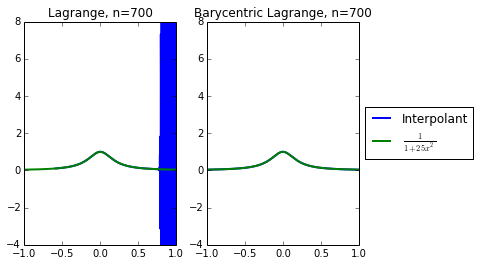

In [9]:
n = 700
npoints = 1000
xpts = np.linspace(-1,1,npoints)
ypts = runge(xpts)

ip_x = cheb_nodes(n)
ip_y = runge(ip_x)

# Lagrange interpolation
basis = Lj(ip_x, xpts)
y = interpolate(basis,runge(ip_x))

plt.subplot(121)
plt.title("Lagrange, n=700")
plt.plot(xpts, y, 'b', linewidth=2.0)
plt.plot(xpts, ypts, 'g', linewidth=2.0)
plt.ylim(-4,8)

# Barycentric Lagrange interpolation
y = bary_lagrange(ip_x, ip_y, (-1,1), npoints)

plt.subplot(122)
plt.title("Barycentric Lagrange, n=700")
plt.plot(xpts, y,'b', label ="Interpolant", linewidth=2.0)
plt.plot(xpts, ypts, 'g', label='$\\frac{1}{1+25x^2}$', linewidth=2.0)
plt.ylim(-4,8)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

plt.show()